In [312]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
# stats of hop_stats_final.csv

db_path = 'hop_stats_final.csv'
df = pd.read_csv(db_path)
df.head()

,start_article_title,starter_article_url,selection_strat,hops_to_phil
0,Bill Moore (pitcher),https://en.wikipedia.org/wiki/Bill_Moore_(pitc...,EMBEDDING_WORD2VEC,8
1,Manuel Silva (basketball),https://en.wikipedia.org/wiki/Manuel_Silva_(ba...,WORDNET,6
2,Jeanne d'Ussel,https://en.wikipedia.org/wiki/Jeanne_d%27Ussel,EMBEDDING_WORD2VEC,6
3,Various Artists – Archives Vol. 4,https://en.wikipedia.org/wiki/Various_Artists_...,WORDNET,12
4,Marcus Aurelius Marius,https://en.wikipedia.org/wiki/Marcus_Aurelius_...,WORDNET,5


In [314]:
df.describe()

,hops_to_phil
count,2154.000000
mean,14.951718
std,12.117381
min,1.000000
25%,7.000000
50%,10.000000
75%,19.000000
max,100.000000


In [315]:
strats = df['selection_strat'].unique()
strats

array(['EMBEDDING_WORD2VEC', 'WORDNET', 'NTH_LINK(1)', 'EMBEDDING_BERT',
       'NTH_LINK(2)', 'RANDOM'], dtype=object)

In [316]:
# stats for each strategy
def get_stats_for_strat(strat):
    df_part = df[df['selection_strat'] == strat]
    # rename column hops_to_phil
    df_part = df_part.rename(columns={'hops_to_phil': 'hops - ' + strat})
    return df_part.describe()


get_stats_for_strat(strats[0])

,hops - EMBEDDING_WORD2VEC
count,611.000000
mean,7.273322
std,2.678804
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,19.000000


In [317]:

def get_hop_stats(df_in, strats):
    df_stats = pd.DataFrame(columns=['selection', 'mean', 'std', 'count'])
    for s in strats:
        df_sel = df_in[df_in['selection_strat'] == s]
        df_stats = pd.concat([
            df_stats, 
            pd.DataFrame([
                [
                    s, 
                    df_sel['hops_to_phil'].mean(), 
                    df_sel['hops_to_phil'].std(), 
                    df_sel['hops_to_phil'].count(),
                    df_sel['hops_to_phil'].min(),
                    df_sel['hops_to_phil'].max()
                ]
            ],
            columns=['selection', 'mean', 'std', 'count', 'min', 'max'])])

    # order by mean
    df_stats = df_stats.sort_values(by=['mean'])

    return df_stats

In [332]:
hop_stats = get_hop_stats(df, strats)
hop_stats

,selection,mean,std,count,min,max
0,EMBEDDING_WORD2VEC,7.273322,2.678804,611,1.0,19.0
0,WORDNET,7.910017,2.957244,589,1.0,17.0
0,EMBEDDING_BERT,9.118280,5.151719,93,2.0,30.0
0,NTH_LINK(1),20.233898,7.481238,295,1.0,54.0
0,NTH_LINK(2),28.394316,12.488462,563,4.0,51.0
0,RANDOM,100.000000,0.000000,3,100.0,100.0


In [334]:
# convert hop stats to pretty latex table

def hop_stats_to_latex(df_in):
    df_in = df_in.rename(columns={'selection': 'Selection', 'mean': 'Mean', 'std': 'Std', 'count': 'Count', 'min': 'Min', 'max': 'Max'})
    # rename selection names
    df_in['Selection'] = df_in['Selection'].apply(lambda x: x.replace('RANDOM', 'Random').replace('EMBEDDING_WORD2VEC', 'word2vec').replace('WORDNET', 'WordNet').replace('EMBEDDING_BERT', 'BERT')
        .replace('NTH_LINK(1)', '1st link').replace('NTH_LINK(2)', '2nd link'))
    # round all float values to 2 decimals
    df_in = df_in.round(2)
    
    return df_in.to_latex(index=False)

print(hop_stats_to_latex(hop_stats))

\begin{tabular}{lrrlrr}
\toprule
Selection &       Mean &       Std & Count &   Min &   Max \\
\midrule
 word2vec &   7.273322 &  2.678804 &   611 &   1.0 &  19.0 \\
  WordNet &   7.910017 &  2.957244 &   589 &   1.0 &  17.0 \\
     BERT &   9.118280 &  5.151719 &    93 &   2.0 &  30.0 \\
 1st link &  20.233898 &  7.481238 &   295 &   1.0 &  54.0 \\
 2nd link &  28.394316 & 12.488462 &   563 &   4.0 &  51.0 \\
   Random & 100.000000 &  0.000000 &     3 & 100.0 & 100.0 \\
\bottomrule
\end{tabular}



C:\Users\thear\AppData\Local\Temp\ipykernel_11028\2655768581.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return df_in.to_latex(index=False)


In [319]:
max_n = 1177
df_phil_stats = pd.DataFrame(
    [
        ['Random', 3, round((3/max_n)*100, 2)],
        ['BERT', 93, round((93/max_n)*100, 2)],
        ['1st link', 295, round((295/max_n)*100, 2)],
        ['2nd link', 563, round((563/max_n)*100, 2)],
        ['WordNet', 589, round((589/max_n)*100, 2)],
        ['word2vec', 611, round((611/max_n)*100, 2)],
    ],
    columns=['Selection', 'N Reached Phil', 'Reached Phil (%)']
)
# df_phil_stats.to_latex(index=False)
print('\\begin{tabular}{lrr}\n\\toprule\nSelection &  N Reached Phil &  Reached Phil (\\%) \\\\\n\\midrule\n   Random &               3 &              0.25 \\\\\n     BERT &              93 &              7.90 \\\\\n 1st link &             295 &             25.06 \\\\\n 2nd link &             563 &             47.83 \\\\\n  WordNet &             589 &             50.04 \\\\\n word2vec &             611 &             51.91 \\\\\n\\bottomrule\n\\end{tabular}\n')

\begin{tabular}{lrr}
\toprule
Selection &  N Reached Phil &  Reached Phil (\%) \\
\midrule
   Random &               3 &              0.25 \\
     BERT &              93 &              7.90 \\
 1st link &             295 &             25.06 \\
 2nd link &             563 &             47.83 \\
  WordNet &             589 &             50.04 \\
 word2vec &             611 &             51.91 \\
\bottomrule
\end{tabular}



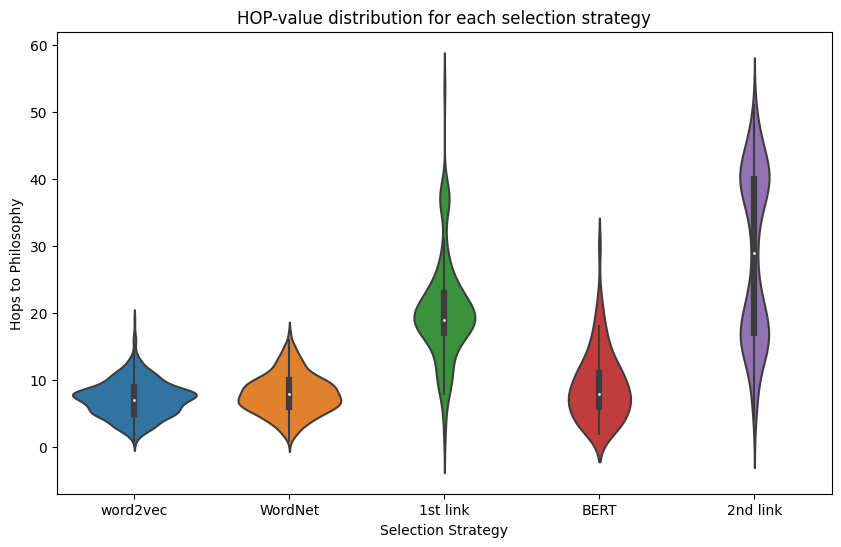

In [320]:
def violin_plot(df_in):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x='selection_strat', y='hops_to_phil', data=df_in, ax=ax)
    ax.set_title('HOP-value distribution for each selection strategy')
    ax.set_xlabel('Selection Strategy')
    ax.set_ylabel('Hops to Philosophy')
    # rename x ticks
    ax.set_xticklabels(['word2vec', 'WordNet', '1st link', 'BERT', '2nd link'])

    
    plt.show()

violin_plot(df[df['selection_strat'] != 'RANDOM'])

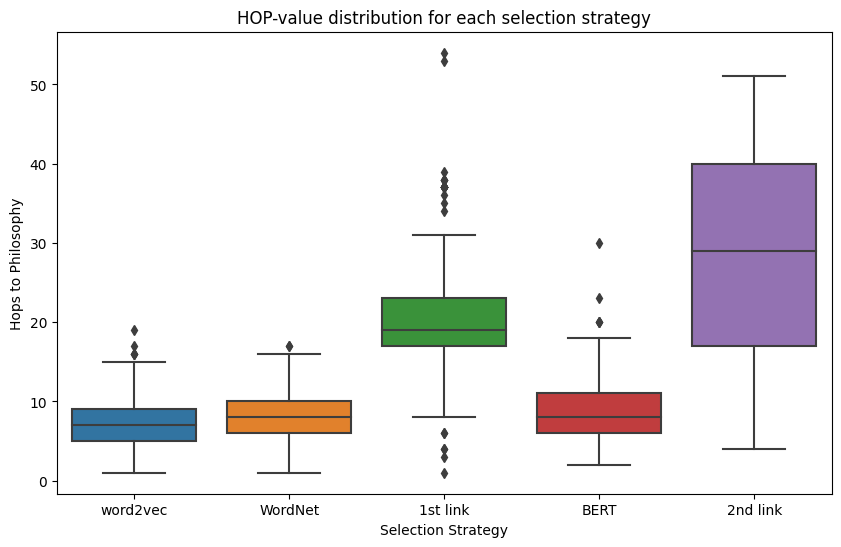

In [331]:
# display boxplots similar to the violin plots

def box_plot(df_in):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='selection_strat', y='hops_to_phil', data=df_in, ax=ax)
    ax.set_title('HOP-value distribution for each selection strategy')
    ax.set_xlabel('Selection Strategy')
    ax.set_ylabel('Hops to Philosophy')
    # rename x ticks
    ax.set_xticklabels(['word2vec', 'WordNet', '1st link', 'BERT', '2nd link'])
    
    plt.show()

box_plot(df[df['selection_strat'] != 'RANDOM'])

In [321]:
df_conc = pd.read_csv('hop_stats_final_conc.csv')
df_conc.head()

,article,concreteness
0,https://en.wikipedia.org/wiki/Monica_Biernat,2.242941
1,https://en.wikipedia.org/wiki/Upper_Cherwell_a...,2.087500
2,https://en.wikipedia.org/wiki/Seshcha_(air_base),2.618125
3,https://en.wikipedia.org/wiki/Bruno_Scipioni,2.838000
4,https://en.wikipedia.org/wiki/Michael_Brand_(a...,2.680625


In [322]:
df_conc.describe()

,concreteness
count,288.000000
mean,2.457820
std,0.318015
min,1.782857
25%,2.241206
50%,2.447611
75%,2.645833
max,3.697500


In [323]:
def violin_plot_conc(df_in):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(y='concreteness', data=df_in, ax=ax)
    
    plt.show()


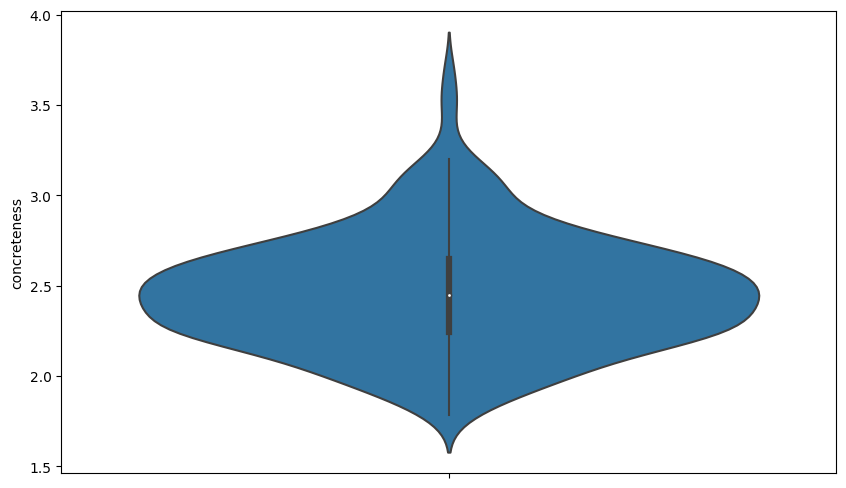

In [324]:
violin_plot_conc(df_conc)

C:\Users\thear\AppData\Local\Temp\ipykernel_11028\1594393058.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_in['concreteness'], ax=ax)


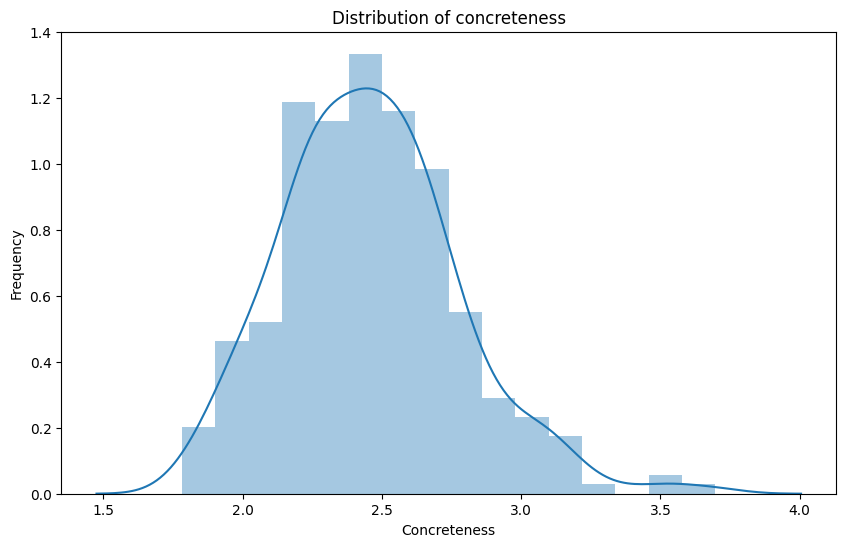

In [325]:
# plot distribution of concreteness

def plot_concreteness(df_in):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.distplot(df_in['concreteness'], ax=ax)
    # set title
    ax.set_title('Distribution of concreteness')
    # set x label
    ax.set_xlabel('Concreteness')
    # set y label
    ax.set_ylabel('Frequency')
    
    plt.show()

plot_concreteness(df_conc)

In [326]:
# get article for min and max concresness
min_conc_article = df_conc[df_conc['concreteness'] == df_conc['concreteness'].min()]['article'].values[0]
max_conc_article = df_conc[df_conc['concreteness'] == df_conc['concreteness'].max()]['article'].values[0]

print(min_conc_article)
print(max_conc_article)

https://en.wikipedia.org/wiki/Henry_Martindale_(priest)
https://en.wikipedia.org/wiki/Harlow_Wilcox


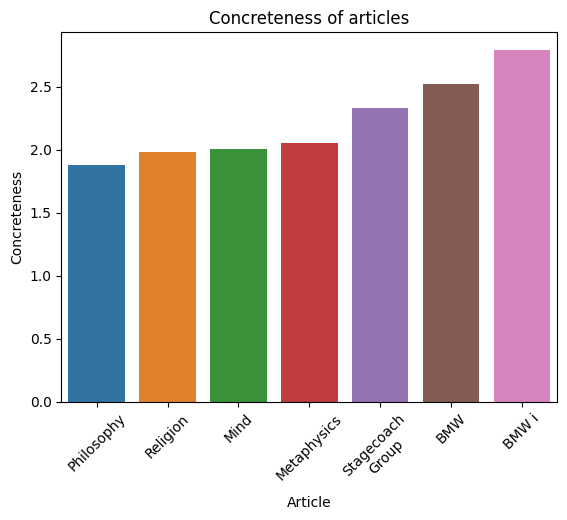

In [327]:
# https://en.wikipedia.org/wiki/Philosophy
# 1.87875
# https://en.wikipedia.org/wiki/Religion
# 1.983125
# https://en.wikipedia.org/wiki/Mind
# 2.0078947368421054
# https://en.wikipedia.org/wiki/Metaphysics
# 2.0554545454545456
# https://en.wikipedia.org/wiki/Stagecoach_Group
# 2.3346153846153843
# https://en.wikipedia.org/wiki/BMW
# 2.5189999999999997
# https://en.wikipedia.org/wiki/BMW_i
# 2.7929411764705883

df_conc_example = pd.DataFrame([
    ['Philosophy', 1.87875],
    ['Religion', 1.983125],
    ['Mind', 2.0078947368421054],
    ['Metaphysics', 2.0554545454545456],
    ['Stagecoach\nGroup', 2.3346153846153843],
    ['BMW', 2.5189999999999997],
    ['BMW i', 2.7929411764705883]
], columns=['article', 'concreteness'])

sns.barplot(x='article', y='concreteness', data=df_conc_example)
plt.xticks(rotation=45)
plt.xlabel('Article')
plt.title('Concreteness of articles')
plt.ylabel('Concreteness')
plt.show()


In [328]:
dfr = pd.read_csv("bert_hop_from_london.csv")

dfr.head()


,article_title,curr_url,words_considered,words_considered_scores,winner_word,winner_score
0,London,https://en.wikipedia.org/wiki/London,"['largest city', 'england', 'united kingdom', ...","[0.2191506768223863, 0.17998600684203306, 0.16...",government,0.285289
1,Government of the United Kingdom,https://en.wikipedia.org/wiki/Government_of_th...,"['central executive authority', 'united kingdo...","[0.2511320834520165, 0.20341036348665484, 0.21...",cabinet,0.336402
2,Cabinet of the United Kingdom,https://en.wikipedia.org/wiki/Cabinet_of_the_U...,"[""his majesty's government"", 'privy council', ...","[0.2841901699901417, 0.24320637683084778, 0.20...",cabinet,0.324930
3,Cabinet (room),https://en.wikipedia.org/wiki/Cabinet_(room),"['room', 'houses', 'palaces', 'early modern eu...","[0.19670963989189946, 0.21123531305446705, 0.2...",humanist avocation,0.375840
4,Renaissance humanism,https://en.wikipedia.org/wiki/Renaissance_huma...,"['classical antiquity', 'in italy', 'western e...","[0.32429592855913797, 0.3164476921655187, 0.28...",moral philosophy,0.578691


In [329]:
# csv: 
# article_title,curr_url,words_considered,words_considered_scores,winner_word,winner_score
dfr_print_words = pd.DataFrame(columns=dfr['article_title'].unique())
dfr_print_scores = pd.DataFrame(columns=dfr['article_title'].unique())

for row in range(dfr.shape[0]):
    w = list(dfr['words_considered'][row].replace('[', '').replace(']','').replace("'", '').replace('"', '').strip().split(','))
    ws = [float(e) if e != 'None' else 0.0 for e in list(dfr['words_considered_scores'][row].replace('[', '').replace(']','').replace(' ', '').split(','))]

    if (len(w)) < 20:
        w += ['-']*(20-len(w))
        ws += [0.0]*(20-len(ws))

    # w will be a column in dfr_print_words
    # ws will be a column in dfr_print_scores

    for i in range(len(w)):
        dfr_print_words.loc[i, dfr['article_title'][row]] = w[i]
        dfr_print_scores.loc[i, dfr['article_title'][row]] = ws[i]

dfr_print_scores



,London,Government of the United Kingdom,Cabinet of the United Kingdom,Cabinet (room),Renaissance humanism,Ethics
0,0.219151,0.251132,0.28419,0.19671,0.324296,0.656146
1,0.179986,0.20341,0.243206,0.211235,0.316448,0.338397
2,0.160015,0.214862,0.202579,0.210066,0.288338,0.0
3,0.163057,0.271741,0.237979,0.180192,0.480748,0.0
4,0.0,0.174223,0.271336,0.350494,0.370396,0.540165
5,0.174719,0.098741,0.285764,0.161582,0.405346,0.355575
6,0.250043,0.247037,0.243206,0.156677,0.486528,0.0
7,0.281424,0.336402,0.32493,0.22306,0.417734,0.0
8,0.174204,0.304532,0.149678,0.0,0.347901,0.285012
9,0.240344,0.217158,0.217737,0.151812,0.578691,0.0


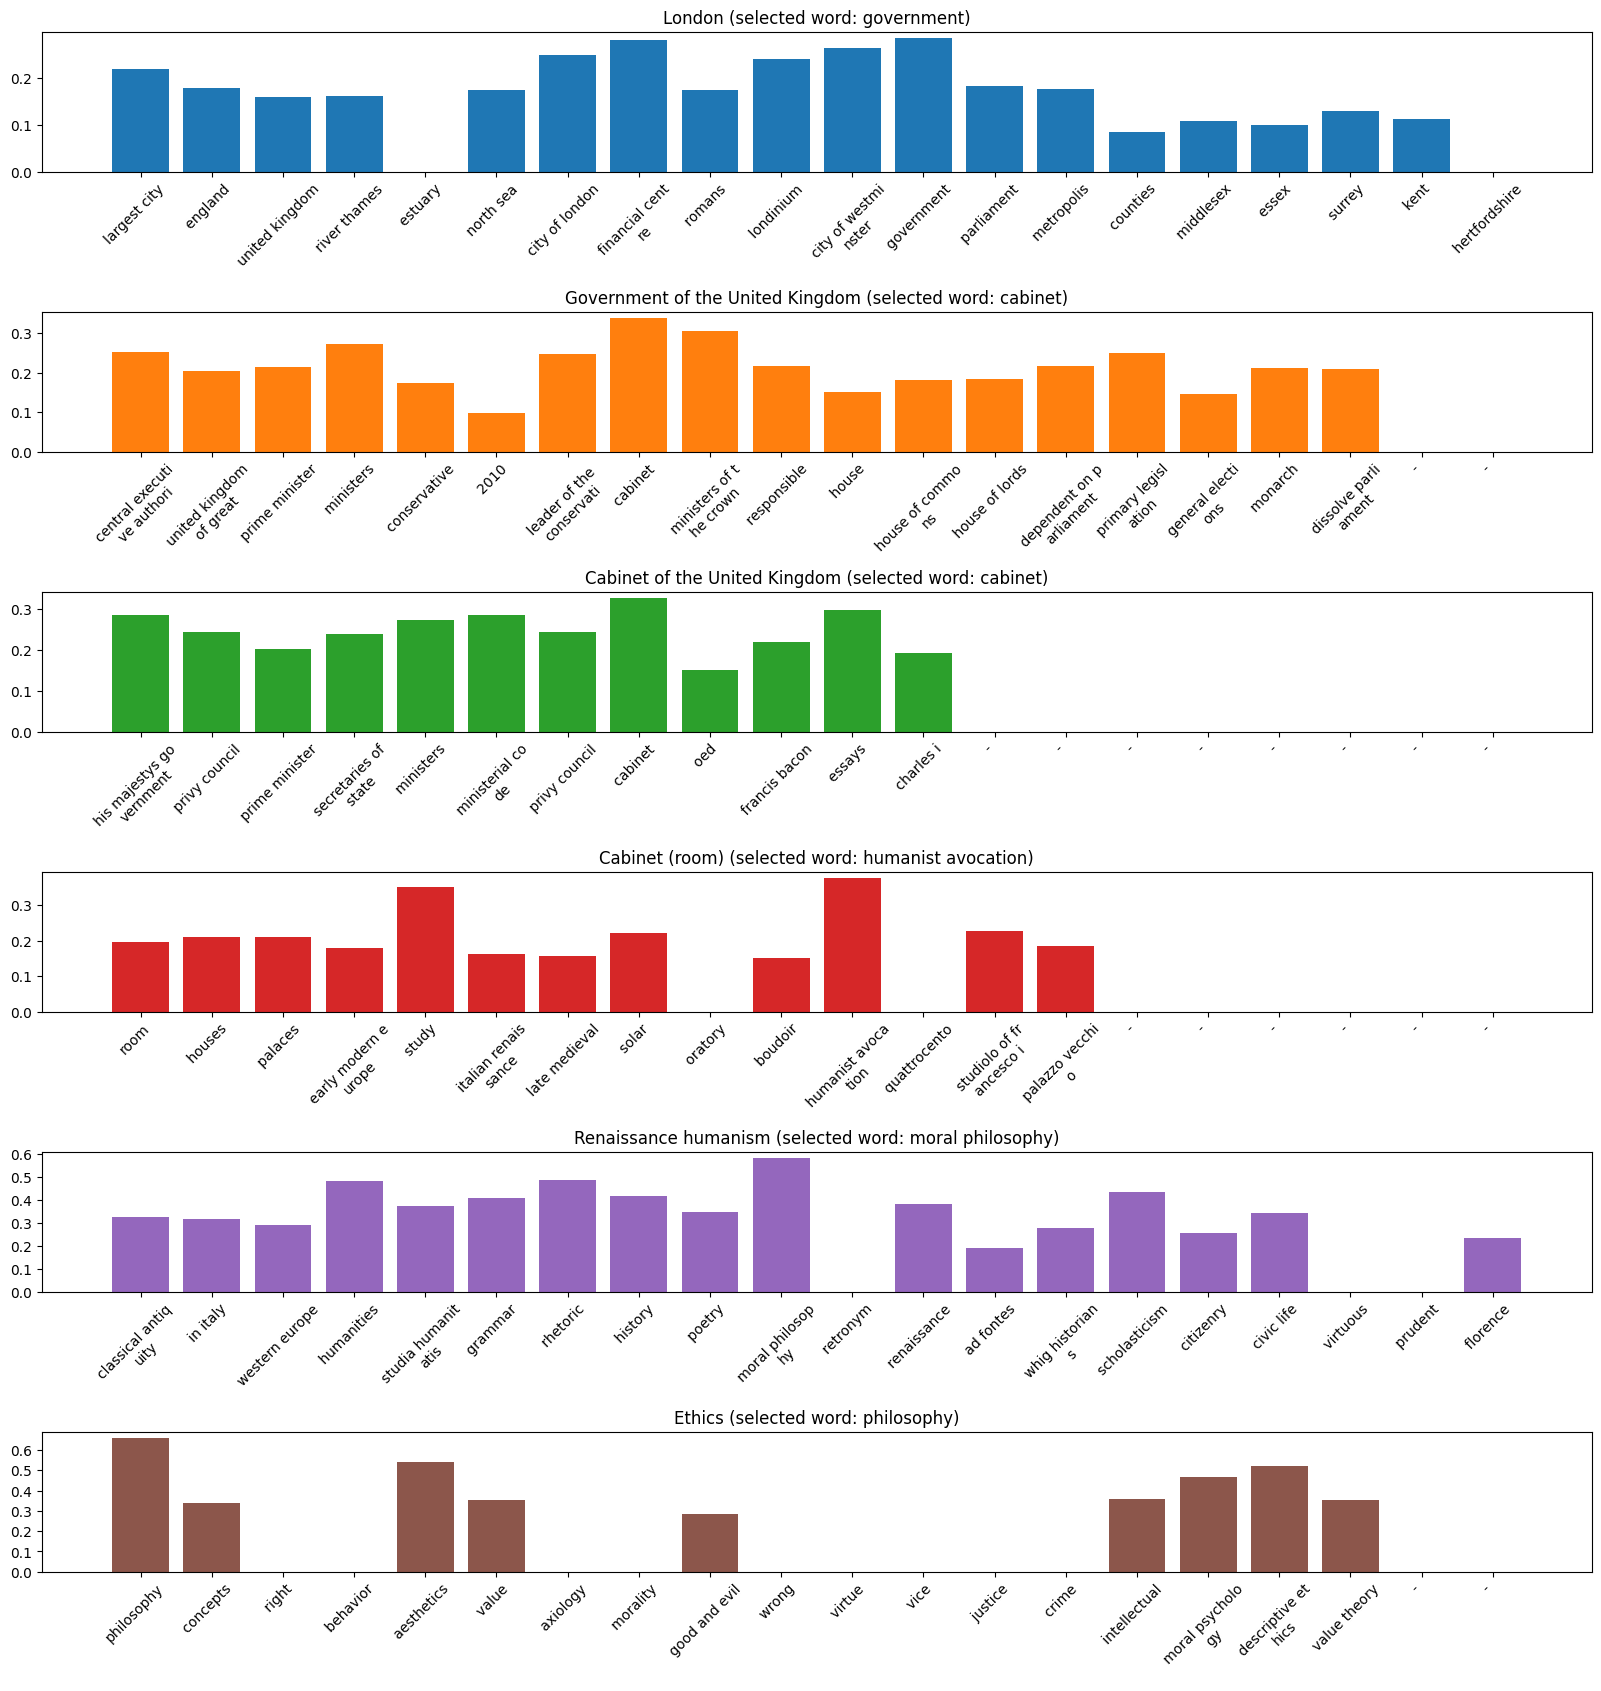

In [330]:
# create plt.figure with 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(20, 20))

# # set title
# fig.suptitle('Hopping from the London article with BERT', fontsize=18)

# # set x label
# fig.text(0.5, 0.04, 'Words', ha='center', fontsize=16)

# # set y label
# fig.text(0.04, 0.5, 'Similarity score', va='center', rotation='vertical', fontsize=16)

# set x ticks
for i in range(6):
    axs[i].set_xticks(range(20))
    # show only first few characters of each word
    axs[i].set_xticklabels([e[:15] + '\n' + e[15:25] for e in dfr_print_words.iloc[:, i].values], rotation=45)
    

# set spacing between subplots
fig.subplots_adjust(hspace=1.0)

# set y ticks
for i in range(6):
    axs[i].set_yticks(np.arange(0, 1.1, 0.1))

# plot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for i in range(6):
    axs[i].bar(range(20), dfr_print_scores.iloc[:, i].values, color=colors[i])

    # add title to each subplot
    winner_word = dfr[dfr['article_title'] == dfr_print_words.columns[i]]['winner_word'].values[0]
    axs[i].set_title(dfr_print_scores.columns[i] + ' (selected word: ' + winner_word + ')')

    # highlight the winner word
    # axs[i].axvline(dfr_print_words.iloc[:, i].values.tolist().index(dfr['winner_word'][i]), color='black', linestyle='--')


plt.show()

    